# Sistemi di feedback e loro effetti

Con questo quaderno esploreremo più in profondità i principi base del controllo del feedback. Ricordiamo le nostre precedenti discussioni sui problemi di sensibilità e robustezza nei sistemi di controllo. Ora approfondiremo questo argomento con maggiore dettaglio.


**Diagramma a blocchi di base**

Dobbiamo prima tracciare lo schema a blocchi di base. Ecco una descrizione:

- Il **Controller** ha una funzione di trasferimento designata come $D$.
- **Pianta** è caratterizzata dalla sua funzione di trasferimento, $G$.
- Il **disturbo** all'impianto è modellato attraverso una funzione di trasferimento $N$, con un input $w$.
- **L'output** del sistema è $y$.
- L'uscita $y$ viene restituita tramite un **sensore** con una funzione di trasferimento $H$.
- Nel loop è presente un **rilevatore di errori**.
- L'**input di riferimento** del sistema è $r$.

Questo ci dà il segnale di errore \$e\$ e il segnale di controllo \$u\$.

<table>
<tr>
    <img src="../pics/13_Principles_of_Feedback_Control_feedback_loop_basic_1.png?1" alt="13_Principles_of_Feedback_Control_feedback_loop_basic_1" style="width:650px;"/>
</tr></table>

Il segnale di errore, indicato come $e_{cap}$, e il segnale di controllo, rappresentato come $u$, sono parti intrinseche di questo diagramma.

La relazione tra l'output $y$ e l'input di riferimento $r$ può essere espressa come il rapporto $\frac{Y(s)}{R(s)}$. Questa relazione è indicata con $M(s)$ ed è data dalla seguente equazione:

$$
M(s)=\frac{Y(s)}{R(s)} = \frac{D(s)G(s)}{1 + D(s)G(s)H(s)}
$$

Questa equazione rappresenta la funzione di trasferimento complessiva del sistema a circuito chiuso.

### Analisi di sensibilità

L'analisi della sensibilità in un sistema di controllo determina il modo in cui i diversi parametri influenzano le prestazioni del sistema. In sostanza, misura quanto sia sensibile la risposta del sistema ai cambiamenti nei parametri del sistema.

#### Sensibilità di M rispetto a G

In precedenza abbiamo derivato che la sensibilità della funzione di trasferimento complessiva $M$ rispetto alla funzione di trasferimento dell'impianto $G$, dove $G$ ha parametri che possono variare, è:

$$ S^M_{G} = \frac{1}{1 + D(s)G(\theta_n, s)H(s)} $$

Qui $G(\theta_n, s)$ implica che il parametro $\theta$ sottoposto a variazione appartiene alla pianta $G$.

#### Sensibilità di M rispetto a H

Allo stesso modo, la funzione di sensibilità rispetto a $H$ è:

$$ S^M_{H} = \frac{-D(s)G(s)H(\alpha_n, s)}{1 + D(s)G(s)H(\alpha_n, s)} $$

Questa equazione fornisce la sensibilità della funzione complessiva relativa alla funzione di trasferimento del sensore, $H$.

#### Conclusioni dall'analisi di sensibilità

Dai nostri quaderni precedenti (vedi `13_Principles_of_Feedback_Control`), sono state tratte alcune conclusioni:

1. **Guadagno del loop e sensibilità a G:** Aumentando il guadagno del loop (che è il prodotto delle funzioni di trasferimento $D$, $G$ e $H$) si riduce la sensibilità di $M$ rispetto a $G $.

2. **Sensibilità del sistema a circuito aperto:** In un sistema a circuito aperto (quando il circuito è interrotto), la sensibilità è unitaria, indicando un'elevata sensibilità alle modifiche dei parametri nell'impianto.

$$ S^M_{G} = 1 $$

#### Impatto sulla selezione del sensore

- L'aumento del guadagno del circuito rende il sistema a circuito chiuso altamente sensibile alle modifiche dei parametri nel sensore (\$H\$).
- **Implicazioni progettuali:** Selezionare sensori robusti e stabili (in grado di resistere a cambiamenti ambientali e di altro tipo).

### Compromessi nel controllo del feedback

È essenziale comprendere che, sebbene il controllo del feedback offra numerosi vantaggi, comporta anche dei compromessi.

- Guadagno del sistema ad anello aperto:

$$
\frac{Y(s)}{R(s)} = D(s)G(s)
$$

- Guadagno del sistema a circuito chiuso:

$$
\frac{Y(s)}{R(s)} = \frac{D(s)G(s)}{1+D(s)G(s)H(s)}
$$


<table>
<tr>
    <img src="../pics/13_Principles_of_Feedback_Control_open_loop_basic.png?1" alt="13_Principles_of_Feedback_Control_open_loop_basic" style="width:450px;"/>
</tr></table>

$$
\frac{Y(s)}{R(s)} = D(s)G(s)
$$

Tuttavia, in un sistema a circuito chiuso, questo guadagno viene ridotto a causa dell'azione di feedback. Il vantaggio di utilizzare il controllo del feedback, principalmente per la robustezza o la riduzione della sensibilità, può talvolta portare a una riduzione delle prestazioni in termini di forma dinamica o precisione in condizioni stazionarie. È un equilibrio che i designer devono trovare.

_La riduzione del guadagno è un compromesso per una migliore sensibilità._

**Implicazioni sulla progettazione**

- Data la perdita di guadagno nei sistemi di feedback, potrebbe esserci la tentazione di introdurre amplificatori o modificare componenti al di fuori del circuito di feedback. Tuttavia, ciò può introdurre altri problemi. Cambiamenti o effetti ambientali su questi componenti potrebbero avere un impatto diretto sull'output del sistema.

- Una strategia più efficace potrebbe essere quella di regolare il guadagno ad anello aperto dell'impianto per tenere conto di questa perdita (ad esempio, aumentare il guadagno degli attuatori nell'impianto) e ottenere un livello di uscita accettabile.


<table>
<tr>
    <img src="../pics/14_Feedback_systems_and_their_effects_adding_amplifiers.png?1" alt="14_Feedback_systems_and_their_effects_adding_amplifiers" style="width:450px;"/>
</tr></table>




- In altre parole, un suggerimento potrebbe essere quello di utilizzare un amplificatore per compensare questa perdita. Ma cosa succede se cambiano i parametri di una qualsiasi unità esterna? Se un elemento, ad esempio la temperatura, cambia ed è al di fuori del ciclo di feedback, la strategia di feedback non terrà conto delle variazioni di questo componente. Ciò porta ad un impatto diretto sull'output del sistema.

- Per dirla semplicemente, anche se l'amplificazione potrebbe sembrare una soluzione semplice, non tiene conto delle complessità e delle variabilità dei sistemi del mondo reale. I cicli di feedback aiutano a garantire stabilità e coerenza di fronte a tali cambiamenti.

Conclusioni
- _È possibile regolare l'impianto \$G\$ per avere un elevato guadagno ad anello aperto per compensare la perdita indotta dal feedback._

- Se viene utilizzato un amplificatore esterno per compensare la perdita di guadagno, qualsiasi modifica dei parametri in questa unità (non nel circuito di feedback) influenzerà direttamente l'uscita del sistema. Ciò evidenzia l'importanza di regolare il guadagno ad anello aperto dell'impianto per garantire livelli di uscita accettabili dopo il feedback

La robustezza o la riduzione della sensibilità è spesso l'obiettivo primario dell'azione di feedback.

- L'obiettivo principale dell'azione di feedback è la robustezza o la riduzione della sensibilità. È possibile ottenere le risposte dinamiche desiderate o la precisione stazionaria in un sistema a circuito aperto. Tuttavia, i problemi del mondo reale come la robustezza o la sensibilità non possono essere ignorati. Il feedback è quindi essenziale, anche se complica la progettazione.

🤔 **Domanda pop-up:** Perché potrebbe essere svantaggioso introdurre un amplificatore al di fuori del circuito di feedback?

**Risposta:** Perché qualsiasi cambiamento o effetto ambientale sull'amplificatore avrà un impatto diretto sull'uscita del sistema poiché la strategia di feedback non terrà conto di queste variazioni.

🤔 **Domanda pop-up:**: Qual è il vantaggio principale di un sistema a circuito chiuso rispetto a un sistema a circuito aperto?

**Risposta**: i sistemi a circuito chiuso sono più robusti e meno sensibili ai disturbi esterni e alle variazioni dei parametri rispetto ai sistemi a circuito aperto.

🤔 **Domanda pop-up**: Come si confronta il controllo feedback con il controllo ad anello aperto in termini di precisione a stato stazionario e risposta dinamica?

**Risposta**: sebbene il controllo ad anello aperto possa talvolta offrire prestazioni migliori in termini di risposta dinamica e precisione in condizioni stazionarie, manca della robustezza e della riduzione della sensibilità fornite dal controllo del feedback.

### Rifiuto del disturbo

In un sistema di feedback, i disturbi possono influenzare l'uscita. La capacità del sistema di respingere questi disturbi è cruciale.


<table>
<tr>
    <img src="../pics/14_Feedback_systems_and_their_effects_noise_rejection.png?1" alt="14_Feedback_systems_and_their_effects_noise_rejection" style="width:650px;"/>
</tr></table>

Considerando la funzione di trasferimento:

$$ \frac{Y(s)}{W(s)} = M_W(s) \frac{N(s)}{1 + D(s) G(s) H(s)} $$

Questa equazione chiarisce il comportamento del sistema in risposta ai disturbi.

- Se il guadagno d'anello $D(s) G(s) H(s)$ è elevato, gli effetti dei disturbi si riducono

- In sostanza, quanto più alto è il guadagno dell'anello, tanto più il sistema riesce a filtrare i disturbi. Tuttavia, l’aumento del guadagno del circuito presenta una serie di sfide, soprattutto se si considera il rumore nel sistema.

- Se $H(s)=0$ (nessun sensore), la reiezione dei disturbi non è possibile. Tutti i disturbi che entrano nell'impianto certamente manifesteranno i loro effetti sull'uscita.

Si noti che in un sistema ad anello aperto (vedere il grafico sotto) il controller non ha informazioni sul disturbo e quindi non può contrastarlo.

<table>
<tr>
    <img src="../pics/14_Feedback_systems_and_their_effects_open_loop_disturbance_1.png?1" alt="14_Feedback_systems_and_their_effects_open_loop_disturbance_1" style="width:450px;"/>
</tr></table>

Poiché i disturbi sono sempre presenti, ciò significa anche che è necessario il feedback!

**Commenti aggiuntivi**
- Il guadagno d'anello ha tre parti $D(s) G(s) H(s)$.
- Non è possibile aumentare il guadagno del loop aumentando il guadagno del sensore $H(s)$.
- Tieni presente che il sistema è sensibile ai parametri del sensore, quindi il sensore è fisso.
- Inoltre, non possiamo modificare $G(s)$ perché questo è il piano.
- L'unico grado di libertà è $D(s)$.
- Nei casi in cui abbiamo la libertà di cambiare $G(s)$ dobbiamo prestare particolare attenzione:
   - $N(s)$ è la funzione di trasferimento tra il disturbo e l'output dell'impianto (arriva alla sommatoria dell'incrocio con l'output del piano - vedi grafico sopra -). Ciò significa che in realtà $N(s)$ è una funzione della pianta $G(s)$. Modificando il guadagno dell'anello tramite $G$ si potrebbe aumentare anche l'effetto del disturbo sull'impianto.
- Per noi modificheremo solo il guadagno del loop attraverso il design del controller $D(s)$.

### Filtraggio del rumore e sue sfide

Il sistema di feedback introduce una potenziale sfida: il **rumore**, in particolare il rumore ad alta frequenza, spesso proveniente dai sensori.

Consideriamo un sistema di feedback con:
- Funzione di trasferimento del controller: \$D(s)\$
- Pianta: \$G(s)\$
- Risultato: \$y\$
- Segnale di rumore: \$v\$ (introdotto al sensore)
- Unity Feedback per la semplificazione

<table>
<tr>
    <img src="../pics/14_Feedback_systems_and_their_effects_noise_rejection_1.png?1" alt="14_Feedback_systems_and_their_effects_noise_rejection_1" style="width:450px;"/>
</tr></table>

- Introduciamo rumore non appena proviamo a misurare l'output $y$.
- $v$ è un segnale ad alta frequenza (rumore)
- I sensori sono la principale fonte di rumore ad alta frequenza nel circuito.


La funzione di trasferimento \$Y(s)/V(s)\$ per il segnale di rumore \$v\$ all'uscita \$y\$ è:

$$
\frac{Y(s)}{V(s)} = \frac{-D(s)G(s)}{1 + D(s)G(s)}
$$

#### Scambia la sensibilità/riduzione del disturbo e la reiezione del rumore

- Dall'equazione sopra, che rappresenta $\frac{Y(s)}{V(s)}$, il guadagno del circuito è $D G$.
- Ciò sta mostrando un chiaro compromesso nei sistemi di feedback.

- Aumentando il guadagno del circuito per la reiezione dei disturbi o la riduzione della sensibilità, aumentiamo anche la suscettibilità del sistema al rumore.

- Questo perché aumentare il guadagno dell'anello significa:

$$
\frac{Y(s)}{V(s)} = \frac{-D(s)G(s)}{1 + D(s)G(s)} \rightarrow 1
$$

- Ciò significa che il segnale di rumore viene iniettato direttamente nel loop.

- Non possiamo raggiungere tutti i requisiti solo aumentando il guadagno del loop.

#### Aggiunta di filtri antirumore ad alta frequenza

- Un approccio comune per affrontare questo problema è l'introduzione di un filtro antirumore ad alta frequenza. Questo filtro garantisce il passaggio solo dei segnali rilevanti filtrando i rumori ad alta frequenza indesiderati.
- È necessario studiare le frequenze in gioco, l'ambiente in cui è installato il sensore e l'effetto dell'ambiente sul sensore per poi progettare o scegliere un filtro sensore adeguato.

🤔 **Domanda pop-up:**: In che modo l'aumento del guadagno del loop influisce sul rumore nel sistema?

**Risposta**: Aumentando il guadagno del loop è possibile amplificare il rumore, rendendolo più prominente nell'output.

## Modellazione della risposta dinamica nei sistemi di controllo del feedback

Ricordare che quando si parla di modellazione della risposta dinamica si stabiliscono i requisiti sulla risposta in stato transitorio e stazionario del sistema.

Ad esempio, nel notebook `13_Principles_of_Feedback_Control`, abbiamo visto che potremmo desiderare una risposta oscillatoria o una risposta sovrasmorzata (a seconda dell'applicazione):

<table>
<tr>
    <img src="../pics/13_Principles_of_Feedback_Control_shaping_dynamic_response.png?2" alt="13_Principles_of_Feedback_Control_shaping_dynamic_response" style="width:650px;"/>
</tr></table>

### Modellare la risposta dinamica

Vedi anche "05_System_response" dal corso svolto nel 2023.

Consideriamo la funzione di trasferimento di un sistema ad anello chiuso:

$$
\frac{Y(s)}{R(s)} = \frac{D(s)G(s)}{1+D(s)G(s)H(s)}
$$

La risposta dinamica di un sistema è influenzata in modo significativo dai suoi poli e dai suoi zeri.

Ricordiamo, i poli di un sistema determinano la natura della risposta del sistema, come il comportamento oscillatorio o non oscillatorio, mentre gli zeri influenzano l'entità di queste risposte.

#### Funzione di trasferimento e poli e zeri del sistema

- **Poli**: determinano la natura della risposta del sistema (oscillatoria, non oscillatoria, di primo ordine, di secondo ordine, ecc.).
- **Zeri**: influenza l'entità della risposta. Ad esempio, gli zeri influenzano solo il residuo dell'espansione della frazione parziale.

**Esempio:**
- Un polo del primo ordine (ad esempio, \$\Large \frac{A_1}{\tau s + 1}\$) influisce sulla velocità di risposta del sistema.
- Uno zero influenza l'ampiezza ($A_1$) di una modalità specifica nella risposta.

### Esempio

Consideriamo due risposte all’impulso:

1. **Risposta rapida**: se $\tau$ è piccolo, la risposta si stabilizza rapidamente.
2. **Risposta lenta**: se $\tau$ è grande, la risposta richiede più tempo per stabilizzarsi.

Possiamo creare grafici per mostrare l'impatto della variazione dei valori di polo e zero sulla risposta di un sistema utilizzando Python, in particolare con librerie come Matplotlib e SciPy.

Ecco uno schema concettuale di come potremmo strutturare il nostro codice Python per generare questi grafici:

- **Configura l'ambiente**: importa le librerie necessarie.
- **Definisci le funzioni di trasferimento**: crea funzioni per rappresentare funzioni di trasferimento con poli e zeri variabili.
- **Simula la risposta**: utilizza la funzione di risposta al gradino per simulare il modo in cui il sistema risponde nel tempo.
- **Traccia le risposte**: utilizza Matplotlib per creare grafici che mostrano la risposta del sistema.

System 1: 1.0s^0 / 1.0s^1 + 3.0s^0
System 2: 1.0s^0 / 1.0s^1 + 5.0s^0


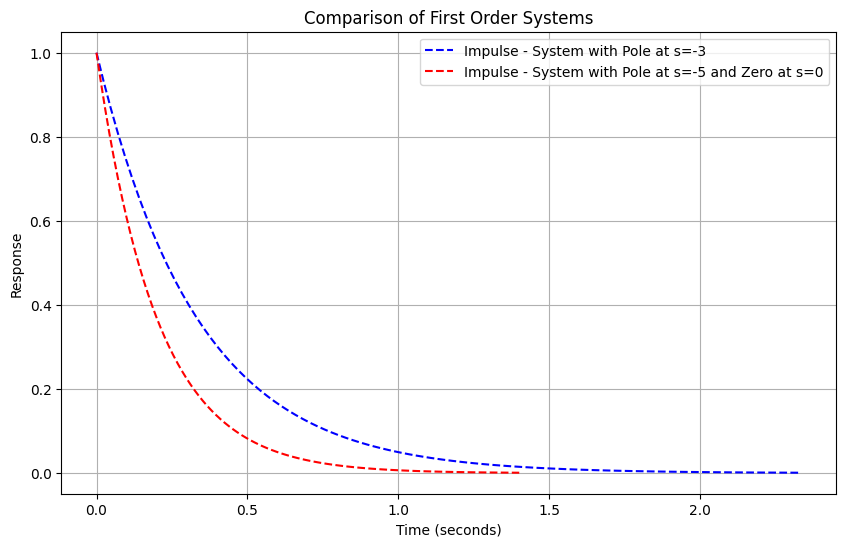

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, impulse, step

def plot_responses(systems, title):
    plt.figure(figsize=(10, 6))
    for sys, label, color in systems:
        t_imp, y_imp = impulse(sys)
        t_step, y_step = step(sys)
        plt.plot(t_imp, y_imp, label=f'Impulse - {label}', linestyle='--', color=color)
        #plt.plot(t_step, y_step, label=f'Step - {label}', linestyle='-', color=color)

    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Response')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def print_transfer_function(sys, label):
    num, den = sys.num, sys.den
    tf_expression = ' + '.join([f'{n}s^{len(num)-i-1}' for i, n in enumerate(num)])
    tf_expression += ' / '
    tf_expression += ' + '.join([f'{d}s^{len(den)-i-1}' for i, d in enumerate(den)])
    print(f'{label}: {tf_expression}')
    

# User specified poles and zeros for first order systems
# Example 1
pole1 = [-3]
zero1 = []  # No zero

pole2 = [-5]
zero2 = []  # No zero

# Example 2
# Compare what happens to the impulse response when we have the same pole but different zeros.
# pole1 = [-5]
# zero1 = [-1]  # Zero in -1

# pole2 = [-5]
# zero2 = [-2]  # Zero in -2


# Creating transfer function systems
system1 = TransferFunction(np.poly(zero1), np.poly(pole1))
system2 = TransferFunction(np.poly(zero2), np.poly(pole2))

print_transfer_function(system1, 'System 1')
print_transfer_function(system2, 'System 2')

# Plotting
plot_responses([
    (system1, 'System with Pole at s=-3', 'blue'),
    (system2, 'System with Pole at s=-5 and Zero at s=0', 'red')
], 'Comparison of First Order Systems')


#### Barra laterale - Effetto degli zeri sulla risposta all'impulso

Il comportamento della risposta all'impulso in un sistema con zeri è strettamente legato alla funzione di trasferimento del sistema, in particolare al modo in cui interagiscono gli zeri e i poli. Parliamo del motivo per cui la risposta all'impulso inizia da un numero negativo quando si ha uno zero e di come la posizione dello zero influisce su questo comportamento.

1. **Impatto degli zeri sulla risposta all'impulso**:
   - In una funzione di trasferimento, uno zero introduce essenzialmente un termine al numeratore che può cambiare la fase della risposta del sistema. Quando viene applicato un impulso, la risposta immediata del sistema è influenzata dal numeratore della funzione di trasferimento.
   - Se uno zero è posto sulla metà sinistra del piano s (parte reale negativa), tende a introdurre uno sfasamento che può far sì che la risposta all'impulso parta da un valore negativo.

2. **Posizione dello zero e della risposta**:
   - L'effetto di uno zero sulla risposta all'impulso non riguarda solo la sua presenza ma anche la sua posizione rispetto ai poli.
   - Più lo zero è vicino all'origine (o al polo), più significativo è il suo impatto sulla risposta iniziale. Tuttavia, il segno dello zero (che sia -1 o 1) non cambia la direzione iniziale della risposta. Ciò che conta di più è la posizione relativa dello zero rispetto ai poli.

3. **Risposta positiva all'impulso iniziale**:
   - Per avere una risposta all'impulso che parta da un numero positivo, è necessario posizionare lo zero in modo tale che non domini la risposta iniziale del sistema. Ciò significa tipicamente posizionare lo zero più lontano dall'origine rispetto a qualsiasi polo, in particolare in un sistema del primo ordine.

4. **Comprensione attraverso la sperimentazione**:
   - Puoi sperimentare il posizionamento dello zero nella tua funzione di trasferimento per osservare come influisce sulla risposta all'impulso. Spostare lo zero ulteriormente nel semipiano sinistro (più negativo) spesso riduce il suo impatto immediato sulla risposta all'impulso.

Ecco un rapido esperimento Python che puoi provare per osservare questi effetti. Regola il valore "zero2" nel seguente frammento di codice per vedere come i diversi posizionamenti influenzano la risposta all'impulso:

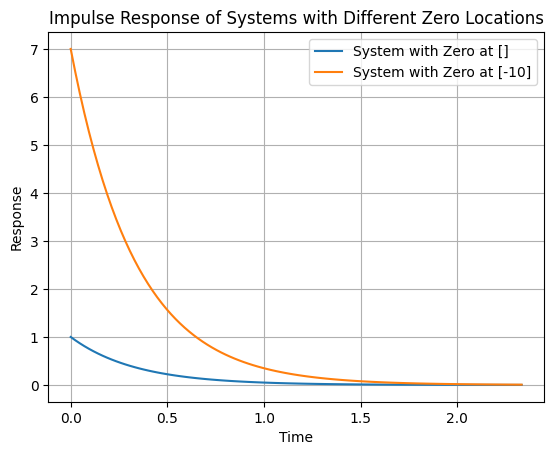

In [ ]:
from scipy.signal import TransferFunction, impulse
import matplotlib.pyplot as plt
import numpy as np

def create_system(pole, zero):
    if zero:  # If zero list is not empty
        numerator = np.poly(zero)
    else:  # If zero list is empty, use a gain of 1
        numerator = [1]
    denominator = np.poly(pole)
    return TransferFunction(numerator, denominator)

pole = [-3]
# Place zeros at different locations and observe
zero1 = []  # Zero at -1
zero2 = [-10]    # No zero

# Creating transfer function systems
system1 = create_system(pole, zero1)
system2 = create_system(pole, zero2)

# Generating impulse responses
t1, y1 = impulse(system1)
t2, y2 = impulse(system2)

# Plotting
plt.plot(t1, y1, label=f'System with Zero at {zero1}')
plt.plot(t2, y2, label=f'System with Zero at {zero2}')
plt.title('Impulse Response of Systems with Different Zero Locations')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()


--- FINE DELLA BARRA LATERALE

### Ruolo del feedback nel modellare la risposta dinamica

Consideriamo la funzione di trasferimento di un sistema ad anello chiuso:

$$
\frac{Y(s)}{R(s)} = \frac{D(s)G(s)}{1+D(s)G(s)H(s)}
$$


Consideriamo \$D(s)\$, \$G(s)\$ e \$H(s)\$ come rapporti di due polinomi:

$$
D(s) = \frac{D_1}{D_2}, \quad G(s) = \frac{G_1}{G_2}, \quad H(s) = \frac{H_1}{H_2}
$$

Sostituendoli nella nostra funzione di trasferimento $M(s)$:

$$
M(s) = \frac{D_1 SOL_1 H_2}{D_2 SOL_2 H_2 + D_1 SOL_1 H_1}
$$

- Modellare la risposta dinamica significa renderla diversa da quella in anello aperto.
- La risposta ad anello aperto è guidata da $G_2(s)$, ovvero i poli di $G$. Ciò significa che i poli di $G$ non sono accettabili date le tue esigenze.

#### Progettare il controller per la dinamica desiderata

- **Obiettivo**: modificare i poli del sistema a circuito chiuso per ottenere una risposta dinamica specifica.
- **Strategia**: regola il controller (\$D_1\$ e \$D_2\$) per ottenere la posizione dei poli desiderata per \$M(s)\$.

Possiamo modificare \$D_1\$ e \$D_2\$ in modo che le radici del denominatore $D_2 G_2 H_2 + D_1 G_1 H_1$ si trovino in posizioni adatte nel piano $s$.

### Problema di progettazione

**Obiettivo**: tradurre la risposta dinamica desiderata in specifiche posizioni dei poli.

**Passaggi**:
1. Determinare le posizioni dei poli corrispondenti alla risposta dinamica desiderata.
2. Progettare \$D_1\$ e \$D_2\$ nel controller per realizzare queste posizioni dei poli nel sistema a circuito chiuso.

Supponiamo che desideri avere questa risposta dinamica:

<table>
<tr>
    <img src="../pics/14_Feedback_systems_and_their_effects_requirement.png?2" alt="14_Feedback_systems_and_their_effects_requirement" style="width:650px;"/>
</tr></table>

La strategia progettuale sarebbe quella di posizionare i poli dove possiamo ottenere la risposta desiderata.
 Attraverso la progettazione di $D(s)$ del controller, saremo in grado di spostare i poli del sistema ad anello chiuso nella posizione desiderata in modo che la risposta dinamica sia quella che desideriamo.
 
È possibile modellare la risposta dinamica progettando opportunamente il controllore (e quindi il numeratore e il denominatore) in modo che i poli in anello chiuso di $M(s)$ siano quelli della forma dinamica richiesta.

🤔 **Domanda pop-up**: Perché non possiamo ottenere la dinamica desiderata attraverso il controllo a circuito aperto?
**Risposta**: Sebbene il controllo ad anello aperto possa teoricamente ottenere la dinamica desiderata (posizionando i poli dove vorremmo), non ha la capacità di adattarsi ai cambiamenti dei parametri del sistema nel tempo, portando a potenziale instabilità e prestazioni degradate.

### I limiti del controllo ad anello aperto nella modellatura dinamica

<table>
<tr>
    <img src="../pics/14_Feedback_systems_and_their_effects_open_loop_disturbance_1.png?1" alt="14_Feedback_systems_and_their_effects_open_loop_disturbance_1" style="width:450px;"/>
</tr></table>

I poli di $G(s)$ non sono accettabili, non ci danno la risposta desiderata.
Vorremmo spostare i poli là dove ci danno la risposta che vogliamo.

#### Strategia di controllo ad anello aperto

- **Idea**: cancella i poli di \$G(s)\$ e sostituiscili con i poli desiderati.
- **Implementazione**: Progettare \$D(s)\$ in modo tale da annullare i poli di \$G(s)\$ e introdurre i poli prescritti.

$$
D(s) = \frac{1}{G(s)} \times \hat{D}(s)
$$

Dove $\hat{D}(s)$ ha i poli desiderati, ad esempio:

$$
\hat{D}(s) = \frac{1}{s^2 + 2\xi\omega_n s + \omega_n^2}
$$

In questo caso,

$$
 \frac{Y(s)}{R(s)} = \frac{1}{s^2 + 2\xi\omega_n s + \omega_n^2}
$$

Che è esattamente ciò che vogliamo.

Questo è il modo più ovvio per raggiungere il nostro obiettivo. Tuttavia, non scegliamo mai questa soluzione... perché?


#### Sfide con il controllo a circuito aperto

1. **Gap modello-impianto**: Il controller progettato sulla base di \$G(s)\$ potrebbe non annullare in modo efficace la dinamica dell'impianto fisico reale. Possiamo utilizzare solo un modello e quindi abbiamo delle imprecisioni, quindi la dinamica dell'impianto non verrà mai annullata. La cancellazione è possibile solo rispetto al modello e non alla pianta. Inoltre, poiché non c'è feedback, il controller non viene a conoscenza di questo errore.

2. **Mancanza di adattabilità**: il controller non si adatta ai cambiamenti dei parametri di sistema nel tempo. Se l'impianto cambia nel tempo (e cambierà) questo potrebbe non essere catturato nel modello, il che significa che le prestazioni si deteriorano nel tempo.

3. **Problemi di robustezza**: il controllo ad anello aperto è sensibile ai disturbi e agli errori di modellazione, che portano a potenziale instabilità.

Nonostante la complessità, il controllo del feedback è preferito per la sua capacità di gestire la robustezza e la reiezione dei disturbi. La regolazione dei poli a circuito chiuso, sebbene impegnativa, è fondamentale per garantire la stabilità del sistema e le prestazioni desiderate nel tempo.

🤔 **Domanda popup**: Perché un controller a circuito aperto, nonostante sembri semplice, non viene spesso utilizzato per la modellazione dinamica?
**Risposta**: i controller ad anello aperto non possono adattarsi ai parametri mutevoli dell'impianto reale nel tempo e qualsiasi divario tra il modello dell'impianto e l'impianto reale può portare a problemi di prestazioni e instabilità.

## Precisione dello stato stazionario nel controllo del feedback

Consideriamo un sistema di controllo con feedback unitario, in cui il fattore di feedback è 1. In questo sistema, il segnale di errore, indicato come \$e\$, gioca un ruolo critico nel determinare le prestazioni del sistema.


<table>
<tr>
    <img src="../pics/14_Feedback_systems_and_their_effects_closed_loop.png?2" alt="14_Feedback_systems_and_their_effects_closed_loop" style="width:650px;"/>
</tr></table>

#### Funzione di trasferimento e segnale di errore

La funzione di trasferimento \$Y(s)/R(s)\$ per il nostro sistema è data da:

$$
\frac{Y(s)}{R(s)} = \frac{D(s)G(s)}{1 + D(s)G(s)}
$$

E la funzione di trasferimento del segnale di errore \$E(s)/R(s)\$ è:

$$
\frac{E(s)}{R(s)} = \frac{1}{1 + D(s)G(s)}
$$

Questa relazione è cruciale in quanto getta le basi per comprendere l’errore di stato stazionario.

### Teorema del valore finale ed errore a regime

Utilizzando il teorema del valore finale, l'errore di stato stazionario \$e_{ss}\$ è determinato da:

$$
e_{ss} = \lim_{s \to 0} sE(s) = \lim_{s \to 0} \frac{sR(s)}{1 + D(s)G(s)} = \lim_{ t \to \infty} e(t)
$$

Questa equazione mostra come l'errore in stato stazionario è correlato all'input \$R(s)\$ e alla funzione di trasferimento del sistema.

### Caso di studio: risposta all'input passo-passo

Analizziamo un caso specifico in cui \$R(s) = \frac{1}{s}\$ (un passo in ingresso).

Per un input a gradini, l'errore di stato stazionario \$e_{ss}\$ diventa:

$$
e_{ss} = \frac{1}{1 + D(0)G(0)}
$$

Qui, \$D(0)G(0)\$ rappresenta il guadagno DC del loop.
Questo è il guadagno del loop alle basse frequenze.

- **Progettando il controller $D(s)$ in modo appropriato, possiamo manipolare questo guadagno per ridurre l'errore in stato stazionario, migliorando così la precisione in stato stazionario.**

- Aumentando il guadagno dell'anello si ottiene una migliore precisione a regime.

### Confronto con il controllo ad anello aperto

In un sistema a circuito aperto, l'errore è:
$$
E(s) = R(s) - Y(s) = R(s) - D(s)G(s)R(s) = R(s)\Grande[ 1 - D(s)G(s) \Grande]
$$

e quindi l'errore a regime per un ingresso a gradino ($R(s) = 1/s$) può essere espresso come:

$$
e_{ss} = 1 - D(0)G(0)
$$

dove abbiamo nuovamente applicato il Teorema del Valore Finale.

È interessante notare che, nel controllo ad anello aperto, è possibile eliminare completamente l'errore di stato stazionario impostando \$D(0)G(0) = 1\$. Tuttavia, questo approccio manca di robustezza e di capacità di reiezione dei disturbi.

In anello chiuso possiamo ottenere un errore stazionario nullo solo al limite.

### Osservazioni conclusive sull'accuratezza dello stato stazionario

Abbiamo visto che il controllo del feedback, utilizzato principalmente per la sua robustezza e qualità di reiezione dei disturbi, ci consente anche di ottimizzare la precisione dello stato stazionario. Tuttavia, il raggiungimento del perfetto equilibrio tra robustezza, precisione e stabilità richiede un'attenta progettazione e la considerazione di tutti gli aspetti del sistema.

## Guadagno ad anello elevato: vantaggi e sfide

Il guadagno di anello elevato è uno strumento di progettazione fondamentale nel controllo automatico, ma presenta una serie di vantaggi e sfide.


Vantaggi dell'elevato guadagno del loop

- **Riduzione della sensibilità**: l'elevato guadagno del loop riduce la sensibilità del sistema alle variazioni dei parametri.
- **Rifiuto disturbi**: migliora la capacità del sistema di respingere i disturbi esterni.
- **Precisione allo stato stazionario**: l'aumento del guadagno del circuito può migliorare la precisione allo stato stazionario del sistema.

Sfide e compromessi

- **Problemi di rumore**: un guadagno del loop elevato può amplificare il rumore ad alta frequenza, riducendo il rapporto segnale/rumore.
- **Vincoli di saturazione e ampiezza di ingresso**: un guadagno eccessivo potrebbe causare la saturazione dei componenti del sistema.
- **Problemi di stabilità**: un guadagno del loop più elevato può rendere il sistema più oscillatorio e incline all'instabilità.

Questi compromessi evidenziano la complessità della progettazione del sistema di controllo. Raggiungere il giusto equilibrio tra questi fattori è essenziale per ottenere prestazioni ottimali del sistema.

🤔 **Domanda pop-up:** Perché non possiamo sempre utilizzare un guadagno del circuito elevato per migliorare le prestazioni del sistema?
**Risposta**: sebbene un guadagno dell'anello elevato migliori la sensibilità, la reiezione dei disturbi e la precisione dello stato stazionario, può introdurre problemi come l'amplificazione del rumore, la saturazione del sistema e problemi di stabilità. Pertanto, è necessario trovare un equilibrio nel design.

### Necessità di andare oltre il controllo proporzionale

Una semplice amplificazione (guadagno) potrebbe non soddisfare tutti i requisiti di controllo (ad esempio, aumentando semplicemente il guadagno dell'amplificatore nel controller \$D(s)\$), potrebbe non soddisfare tutti i requisiti di controllo. Pertanto, dobbiamo esplorare ulteriori azioni di controllo, vale a dire azioni derivate e integrali.

#### Controllo derivato e integrale

- **Controllo derivativo**: comporta l'iniezione di un segnale proporzionale alla derivata dell'errore nel loop.
- **Controllo integrale**: implica l'utilizzo dell'integrale del segnale di errore.

Queste strategie di controllo aiutano a superare i limiti del controllo proporzionale, portando a un sistema di controllo più robusto e versatile.